# Tratamiento de Datos
## En este notebook realizaremos algunas modificaciones en los datos para poder aplicar los algoritmos de manera eficiente

Vamos a realizar las siguientes modificaciones en los datos:
1. Normalización de las frecuencias
2. Generación de nueva estructura de dataSet
3. Normalización del FLUX

In [1]:
# Preparación
# Llamamos a las librerías que serán necesarias en la ejecución de este notebook
from astropy.io import fits  # Tratamiento de ficheros Fits
import pandas as pd  # Tratamiento de datos como tablas
import os # Libraría para gestionar Sisitema Operativo

# IMPORTANTE
# Cambiamos la carpeta de trabajo a dónde tenemos los archivos csv con el datasete de extracción de datos.
os.chdir("/home/vicente/Galassify/NoteBooks")


# Configuramos la forma en que se muestran los float (6 decimales)
pd.options.display.float_format = '{:20,.6f}'.format


In [2]:
# Cargamos el Dataset que vamos a tratar
datasetV2 = pd.read_csv("datasetV1_8Campos3K.csv", sep=";")
datasetV2.head()


,PLATE,MJD,FIBER,Z,FLUX,LOGLAM,LAM,LAMZ
0,2099,53469,148,0.077807,2.359190,3.579300,"3,795.770330","3,521.752634"
1,2099,53469,148,0.077807,4.102036,3.579400,"3,796.645626","3,522.564743"
2,2099,53469,148,0.077807,-3.086914,3.579500,"3,797.519039","3,523.375104"
3,2099,53469,148,0.077807,1.223704,3.579600,"3,798.394739","3,524.187587"
4,2099,53469,148,0.077807,1.290559,3.579700,"3,799.268555","3,524.998321"


In [4]:
datasetV2.tail(60)

,PLATE,MJD,FIBER,Z,FLUX,LOGLAM,LAM,LAMZ
11872690,2219,53816,36,0.011900,4.212522,3.958300,"9,084.480848","8,977.649542"
11872691,2219,53816,36,0.011900,-0.013517,3.958400,"9,086.570721","8,979.714838"
11872692,2219,53816,36,0.011900,2.543104,3.958500,"9,088.661075","8,981.780610"
11872693,2219,53816,36,0.011900,1.355200,3.958600,"9,090.756900","8,983.851789"
11872694,2219,53816,36,0.011900,0.823200,3.958700,"9,092.848217","8,985.918512"
11872695,2219,53816,36,0.011900,3.385055,3.958800,"9,094.945007","8,987.990645"
11872696,2219,53816,36,0.011900,0.119529,3.958900,"9,097.037287","8,990.058320"
11872697,2219,53816,36,0.011900,4.871220,3.959000,"9,099.135044","8,992.131408"
11872698,2219,53816,36,0.011900,2.437845,3.959100,"9,101.228288","8,994.200036"
11872699,2219,53816,36,0.011900,0.672951,3.959200,"9,103.322014","8,996.269140"


## Análisis de las frecuencias de los espectros
El codigo siguiente realiza una revisión de los espectros y su rango de frecuencias para poder seleccionar un rango más adecuado, calculando el numero de muestras, el máximo y le mínimo y asociando esta información al dataframe .
En este estudio se identificaron espectros con menos de 3700 muestras.
Finalmente se decidió utilizar como referencia las frecuencias del primer espectro.

Adicionalmente a los campos típicos de identificación de cada galaxia, y el N, Max, Min y el Rango, vamos a calcular la mediana en el intervalo de la banda G (entre las frecuencias 4000 y 5250) para cada espectro. Este valor nos servirá posteriormente para normalizar el FLUX de cada espectro.

En función de los valores obtenidos en esta tabls, desecharemos algunos espectros que puedan desvirtuar el estudio (muy pequeños o con rango de frecuencia muy extremas)

In [5]:
# Intentamos averiguar las muestras y rango frecuencias de los espectros
import matplotlib.pyplot as plt
import statistics as stat

# Generamos un nuevo dataframe con las diferentes galaxias que hay en el dataset para poder iterar sobre ellas
dfMuestra = datasetV2[['PLATE', 'MJD', 'FIBER', 'Z']].drop_duplicates().reset_index(drop=True)
dfMuestra['Num'] = 0.0
dfMuestra['Max'] = 0.0
dfMuestra['Min'] = 0.0
dfMuestra['Range'] = 0.0
dfMuestra['MedBandaG'] = 0.0

for r in range(0, len(dfMuestra)):
    p = dfMuestra.PLATE[r]
    m = dfMuestra.MJD[r]
    f = dfMuestra.FIBER[r]
    ds = datasetV2[(datasetV2.PLATE == p) & (datasetV2.MJD == m) & (datasetV2.FIBER == f)]    
    dfMuestra.Num[r] = len(ds)
    dfMuestra.Max[r] = ds['LAMZ'].max()
    dfMuestra.Min[r] = ds['LAMZ'].min()
    dfMuestra.Range[r] = dfMuestra.Max[r]- dfMuestra.Min[r]
    bandaG = ds[(ds.LAMZ >= 4000) & (ds.LAMZ <=5250)]
    if (len(bandaG) > 0):
        dfMuestra.MedBandaG[r] = stat.median(bandaG['FLUX'])
    else:
        dfMuestra.MedBandaG[r] = 0.0

dfMuestra.head()
                            

/home/vicente/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/vicente/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/vicente/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/vicente/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to 

,PLATE,MJD,FIBER,Z,Num,Max,Min,Range,MedBandaG
0,2099,53469,148,0.077807,"3,843.000000","8,530.194706","3,521.752634","5,008.442071",8.576396
1,1815,53884,1,0.091045,"3,804.000000","8,418.934892","3,507.172328","4,911.762564",10.524748
2,699,52202,92,0.043789,"3,824.000000","8,822.411218","3,658.366051","5,164.045167",9.448701
3,1924,53330,267,0.212605,"3,819.000000","7,581.948657","3,147.609902","4,434.338755",9.014061
4,5440,55983,132,0.237888,"4,641.000000","8,350.616508","2,868.920759","5,481.695749",4.655326


In [9]:
# Hacemos un limpiado de los espectros que son demasiado pequeños o que tienen alguna característica que desvirtue el estudio. 

# Conservamos los espectros de rango mayores de 4000
dfMuestra = dfMuestra[dfMuestra.Range > 4000]

# Conservamos los espectros con el mínimo menor de 4000
dfMuestra = dfMuestra[dfMuestra.Min < 4000]

# Eliminamos los espectros con el varianza = 0 (significa que todos los flux = 0)
dfMuestra = dfMuestra[dfMuestra.MedBandaG > 0]

# Desechamos las galaxias con Z > 0.25
dfMuestra = dfMuestra[dfMuestra.Z < 0.25]

# Desechamos las galaxias con Max < 7500
dfMuestra = dfMuestra[dfMuestra.Max > 7500]


dfMuestra.shape

(2920, 9)

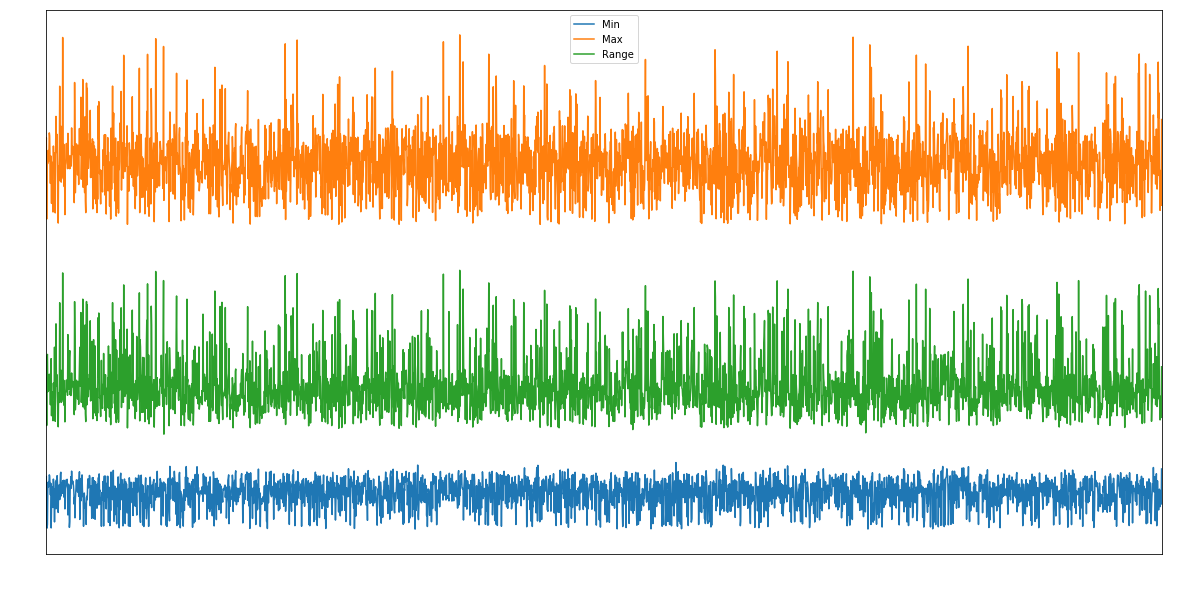

In [10]:
# Dibujamos los parametros calculados

dfMuestra.plot(y=['Min', 'Max', 'Range'], figsize=[20, 10])
plt.xlabel('Espectro').set_color("white")
plt.tick_params(colors='w')
plt.show()


## Normalización de las frecuencias y el FLUX
Para poder comparar las galaxias, hay que normalizar las frecuencias en las que se realizan las muestras en el eje de las abscisas de modo que todas las muestras estén realizadas en las mismas frecuencias. Para ello tomaremos como referencia las frecuencias tratadas del primer espectro (LAMZ) y recalulamos los FLUX para todos los espectros utilizando interpolación.

Además, desecharemos los espectros con Z > 0.25

En este paso también normalizamos los FLUX dividiendolo por la mediana de los valores de cada espectro en la Banda G (entre 4000A y 5250A)

In [11]:
# Regeneramos el indice
dfMuestra.index = range(len(dfMuestra))

# Ahora cogemos las frecuencia sin corregir del primer espectro y la guardamos en una lista
# Esta lista será la referencia para generar el resto de los espectros
dfIndex = datasetV2[(datasetV2.PLATE == dfMuestra.PLATE[0]) & (datasetV2.MJD == dfMuestra.MJD[0]) & (datasetV2.FIBER == dfMuestra.FIBER[0])]
listIndex = list(dfIndex['LAMZ'])

# Normalizamos el primer espectro antes de meterlo en el dataset
dfIndex.FLUX = dfIndex.FLUX / dfMuestra.MedBandaG[0]

# Definimos las columnas del dataSet final con los datos identificativos de cada espectro (Plate, MJD, Fiber, Z) y las frecuencias de referencia e insertamos el primer espectro
campos = ['PLATE', 'MJD', 'FIBER', 'Z'] + listIndex
dfV2 = pd.DataFrame([[dfMuestra.PLATE[0], dfMuestra.MJD[0], dfMuestra.FIBER[0], dfMuestra.Z[0]] + list(dfIndex.FLUX)], columns=campos)

for i in range(1, len(dfMuestra)):
    # Hallamos la lista de frecuencias del espectro que queremos interpolar y lo ponemos como indice del dataframe junto con sus valores
    dfInter = datasetV2[(datasetV2.PLATE == dfMuestra.PLATE[i]) & (datasetV2.MJD == dfMuestra.MJD[i]) & (datasetV2.FIBER == dfMuestra.FIBER[i])][['LAMZ','FLUX']]
    datos = list(dfInter.FLUX)
    listInter = list(dfInter.LAMZ)
    
    dfInter = pd.DataFrame(datos, index=listInter, columns=['FLUX'])
    # Combinamos la lista de referencia con la lista de frecuencias del espectro que queremos interpolar
    listSuma = list(set(listIndex + listInter))
    listSuma.sort()
    
    # Reindexamos el espectro a interpolar (incorporando las frecuencias de referencias con las ya existentes). 
    # Esto produce que las freceuncias que ya tenía el espectro se conserven, pero los FLUX de las nuevas estarán como NAN.
    # El metodo Interpolate calcula estos puntos asignandole el valor proporcional desde los puntos más cercanos.
    # Ejemplo: Espectro existentes: L[1,3,5,7] F[2,6,10,14].
    #          Espectro de Referencia: L[1,2,3,4,5] F[1,2,3,4,5]. 
    #          Espectros Combinados: L[1,2,3,4,5,7] F[2, NaN, 6, NaN, 10, 14]. 
    #          Espectro Interpolado: L[1,2,3,4,5,7] F[2, 4, 6, 8, 10, 14].
    
    dfInter = dfInter.reindex(index=listSuma)
    dfInter = dfInter.interpolate()

    # Seleccionamos del Dataframe, solamente las frecuencias de referencia
    dfInter = dfInter.loc[listIndex]
    
    # Dividimos el FLUX resultante por la mediana de la banda G para normalizarlo
    dfInter.FLUX = dfInter.FLUX / dfMuestra.MedBandaG[i]
    
    # Insertamos la info en el dataset final donde cada registro es un espectro
    datos = [dfMuestra.PLATE[i], dfMuestra.MJD[i], dfMuestra.FIBER[i], dfMuestra.Z[i]] + list(dfInter.FLUX)
    dfV2 = dfV2.append(pd.DataFrame([datos], columns=campos), ignore_index=True)

dfV2.head()


/home/vicente/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,PLATE,MJD,FIBER,Z,3521.7526342228607,3522.5647426020278,3523.375103991887,3524.187586508999,3524.9983212319657,3525.809242463392,...,8512.535069625352,8514.493367131377,8516.456790496382,8518.415990189142,8520.38031810236,8522.340420397488,8524.305653275644,8526.266658588971,8528.228115028993,8530.19470559653
0,2099,53469,148,0.077807,0.275079,0.478294,-0.359931,0.142683,0.150478,-0.309464,...,1.085501,0.975357,0.840669,1.167827,0.930928,0.947321,0.825891,0.796847,1.153183,1.039293
1,1815,53884,1,0.091045,0.709307,0.658761,0.498924,0.290177,0.356882,0.706953,...,0.652625,0.652625,0.652625,0.652625,0.652625,0.652625,0.652625,0.652625,0.652625,0.652625
2,699,52202,92,0.043789,nan,nan,nan,nan,nan,nan,...,0.548758,0.674267,0.855339,0.821121,0.543326,0.567481,0.525696,0.592036,0.506667,0.752494
3,1924,53330,267,0.212605,0.894497,0.920469,0.834170,0.856051,0.761551,0.556406,...,0.954588,0.954588,0.954588,0.954588,0.954588,0.954588,0.954588,0.954588,0.954588,0.954588
4,5440,55983,132,0.237888,0.468574,0.225092,0.231913,0.392855,0.435504,0.352438,...,0.702982,0.702982,0.702982,0.702982,0.702982,0.702982,0.702982,0.702982,0.702982,0.702982


## Limpieza de los extremos de los espectros
Antes de poder tratar los datos en la fase de algoritmias, tenemos que limpiar los extremos de los mismos con el fin de que todos los espectros tengan datos en todas las frecuencias.

Para ello determinamos el máximo mínimo y el mínimo máximo en las frecuencias con los espectros actuales para saber cuanto tenemos que recortar.

In [13]:
# Calculamos el máximo mínimo y el mínimo máximo de la tabla de Muestra de las Galaxias para saber los límites laterales que tenemos que eliminar a los espectros
limInferior = dfMuestra.Min.max()
limSuperior = dfMuestra.Max.min()

columnasBorrar = dfV2.columns[4:][(dfV2.columns[4:] < limInferior) | (dfV2.columns[4:] > limSuperior)]
dfV2 = dfV2.drop(columnasBorrar, 1)



## Guardamos el DataSet

In [17]:
dfV2.to_csv("datasetV3_3KRandom.csv", index=False, header=True, sep=";")

In [18]:
# Definimos una función que pasado un numero de índice dibuja el espectro correspondiente
# IMPORTANTE
# Este desarrollo se ha realizado con el skin dark de Jupyter Lab. Si se utiliza otra configuración de colores, es posible que se tenga
# que cambiar el color white o w por black o b para poder visualizar las etiquetas de los ejes de la gráfica.
def plotSpectro(n):
    myTitle = str(int(dfV2.iloc[n][0])) + '-' + str(int(dfV2.iloc[n][1])) + '-' + str(int(dfV2.iloc[n][2]))+ ' (Z=' + str(dfV2.iloc[n][3]) + ')'
    plt.figure(figsize=[20,10])
    plt.xlabel('Frecuencia').set_color("white")
    plt.ylabel('FLUX').set_color("white")
    plt.tick_params(colors='w')
    plt.plot(list(dfV2.columns[4:]), list(dfV2.iloc[n][4:]))
    t = plt.title(myTitle)
    plt.setp(t, color='w') 
    plt.grid()

    plt.show()


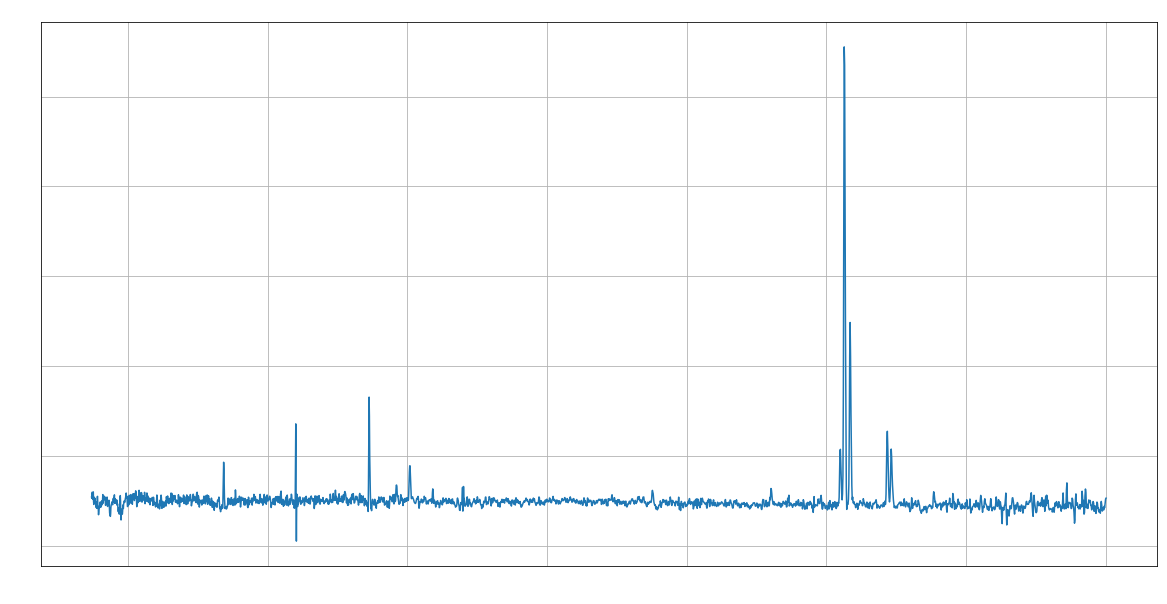

In [19]:
# Visualizamos el espectro que queramos del dataset, indicando su índice
plotSpectro(3)